In [1]:
import json, os
i = 2
directory = os.getcwd()
monpremierex = json.load(open(f"{directory}/input/tcl{i}/tcl{i}.json", "r"))
monpremierex_output = json.load(open(f"{directory}/output/tcl{i}/tcl{i}.json", "r"))

In [2]:
print(monpremierex)

{'name': 'tcl1', 'input_path': 'tcl/input/tcl1', 'output_path': 'tcl/output/tcl1', 'working_dir': 'tcl/input/tcl1', 'initial_temperature': 17.821814137120445, 'coefDeltaTemp': 0.05625, 'coefConso': 1, 'puissanceMin': 0, 'puissanceMax': 4, 'temperature_max': 20.881177515889288, 'temperature_min': 15.189519888881797, 'chroniqueTempExt': [14.851592067795163, 15.763845713889914, 12.05558541676923, 16.41600294075639, 15.135996511654634, 17.263317356668384, 13.58092720549007, 16.403832445265863, 15.020752705287064, 15.23961442394133, 15.960070590840688, 16.32893090943073, 15.424435766693954, 15.628057913544264, 16.382275522842217, 15.528029569654924, 16.701757375555747, 17.637445055679876, 17.096668955174664, 19.833885636572067, 20.201661116713023, 19.876432699556823, 20.44731041748978, 21.703843080313085, 22.73477400508015, 21.402556506167308, 23.445976121829556, 22.6471046112805, 21.831300884978983, 21.5489744501422, 23.022717630577812, 22.53958946347968, 21.123044284953558, 21.35722060404

In [3]:
temperature_max = monpremierex["temperature_max"]
temperature_min = monpremierex["temperature_min"]
coefDeltaTemp = monpremierex["coefDeltaTemp"]
electricity_cost = monpremierex["electricity_cost"]
coefConso = monpremierex["coefConso"]
initial_temperature = monpremierex["initial_temperature"]
chroniqueTempExt = monpremierex["chroniqueTempExt"]
puissanceMin = monpremierex["puissanceMin"]
puissanceMax = monpremierex["puissanceMax"]
load = monpremierex_output["load"]


In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
T = 48
temp_profile = np.zeros(T)
temp_profile[0] = initial_temperature
temp_min_liste =  [temperature_min for k in range(T)]
temp_max_liste =  [temperature_max for k in range(T)]
for t in range(1,T):
    temp_profile[t] = temp_profile[t - 1] + load[t] * coefConso*0.5 + 0.5*coefDeltaTemp*(chroniqueTempExt[t-1]-temp_profile[t-1])

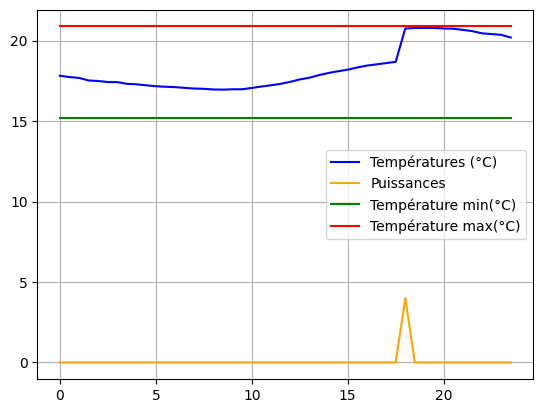

In [6]:
temps = [k/2 for k in range(48)]
plt.plot(temps, temp_profile, label='Températures (°C)', color='blue', marker='')
plt.plot(temps, load, label='Puissances', color='orange', marker='')
plt.plot(temps, temp_min_liste, label='Température min(°C)', color='green', marker='')
plt.plot(temps, temp_max_liste, label='Température max(°C)', color='red', marker='')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
facture_totale=0
for i in range(4):
    tcl_i = json.load(open(f"{directory}/output/tcl{i+1}/tcl{i+1}.json", "r"))
    facture_totale+=tcl_i["cost"]
print(facture_totale)

-2325.5374602942134
